# Simple ConvNet on Cifar-10

INPUT ⇒ CONV ⇒ RELU ⇒ FC

Simple ConvNet Architecture 구현

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

class ConvNet:
    @staticmethod     # 객체 선언안해도 함수 사용 가능
    def build(width, height, depth, classes):
        # initialize the model along with the input shape to be
        # "channels last"
        model = Sequential()
        inputShape = (height, width, depth)

        # define the first (and only) CONV => RELU layer
        model.add(Conv2D(32, (3, 3), padding="same", input_shape=inputShape))
        model.add(Activation("relu"))

        # softmax classifier
        model.add(Flatten())
        model.add(Dense(classes))
        model.add(Activation("softmax"))

        # return the constructed network architecture
        return model

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10

import matplotlib.pyplot as plt
import numpy as np

Loading CIFAR-10 data

In [ ]:
((trainX, trainY), (testX, testY)) = cifar10.load_data()

Modify data to train in MLP model
* Change value range from 0 to 1

In [ ]:
# insert code
trainX = trainX / 255.
testX = testX / 255.

Change label to one-hot encoder

In [ ]:
# insert code
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [ ]:
labelNames = ["airplane", "automobile", "bird", "cat", "deer",
              "dog", "frog", "horse", "ship", "truck"]

Compiling model

In [ ]:
model = ConvNet.build(width=32, height=32, depth=3, classes = 10)

In [ ]:
model.summary()   # param : (3*3*3+1)*32 = 896

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                327690    
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 328,586
Trainable params: 328,586
Non-trainable params: 0
_________________________________________________________________


In [ ]:
opt = SGD(0.01)
model.compile(loss='categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

Training network

In [ ]:
H = model.fit(trainX, trainY, validation_data = (testX, testY), batch_size=32, epochs=20, verbose = 1)

Epoch 1/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8178 - accuracy: 0.3612 - val_loss: 1.6440 - val_accuracy: 0.4247
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5668 - accuracy: 0.4558 - val_loss: 1.4852 - val_accuracy: 0.4749
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4049 - accuracy: 0.5106 - val_loss: 1.4403 - val_accuracy: 0.4988
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3089 - accuracy: 0.5442 - val_loss: 1.3730 - val_accuracy: 0.5023
Epoch 5/20
1563/1563 [==============================] - 5s 4ms/step - loss: 1.2510 - accuracy: 0.5632 - val_loss: 1.3249 - val_accuracy: 0.5298
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2080 - accuracy: 0.5797 - val_loss: 1.2785 - val_accuracy: 0.5556
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1745 - accuracy: 0.5907 - val_loss: 1.2605 - val_accuracy:

Evaluating network

In [ ]:
model.evaluate(testX, testY, batch_size=32, verbose=1)

313/313 [==============================] - 1s 3ms/step - loss: 1.2325 - accuracy: 0.5696


[1.232472538948059, 0.569599986076355]

Plot the training loss and accuracy

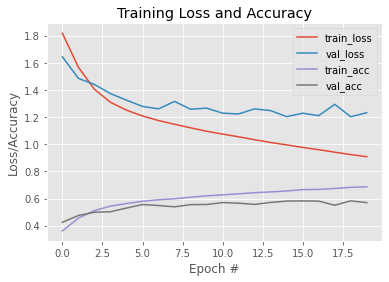

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

## serializing network

In [14]:
from google.colab import drive

drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [15]:
cd gdrive/My\ Drive/DL

/content/gdrive/My Drive/DL


In [16]:
model.save("convnet_weights.hdf5")

In [17]:
ls -lh convnet_weights.hdf5

-rw------- 1 root root 1.3M Jul  2 06:41 convnet_weights.hdf5
